In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/91992/OneDrive/Documents/sem-6/DSBD/practical/airquality.csv')

In [3]:
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


### DATA CLEANING

In [4]:
data.isnull().sum()

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

In [5]:
data.shape

(108035, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [7]:
columns = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in columns:
    data[col] = data[col].fillna(data[col].mean())

data['AQI_Bucket'] = data['AQI_Bucket'].fillna(data['AQI_Bucket'].mode()[0])

In [8]:
data.isnull().sum()

StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

### DATA INTEGRATION

In [9]:
pollution = data[['PM2.5','PM10','NO','NO2','NOx','NH3','CO', 'SO2']]
station_id = data[['StationId']]

In [10]:
integrated = pd.concat([pollution, station_id], axis=1)

In [13]:
integrated.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,StationId
0,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,AP001
1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,AP001
2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,AP001
3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,AP001
4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,AP001


### ERROR CORRECTING

<Axes: ylabel='AQI'>

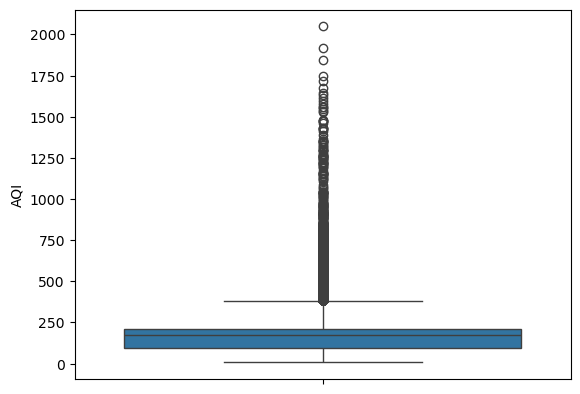

In [16]:
import seaborn as sns
sns.boxplot(data['AQI'])

In [17]:
import numpy as np
def remove_outlier(column):
    q1 = column.quantile(0.25)
    q2 = column.quantile(0.75)
    IQR = q2 - q1
    lower = q1 - 1.5 * IQR
    upper = q2 + 1.5 * IQR
    outlier = np.logical_or(column < lower, column > upper)
    return column[~outlier]

In [19]:
for col in columns:
    data[col] = remove_outlier(data[col])

In [20]:
data.shape

(108035, 16)

<Axes: ylabel='AQI'>

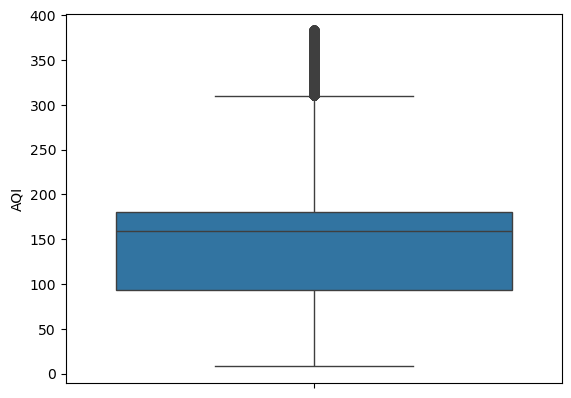

In [21]:
sns.boxplot(data['AQI'])

### LABEL ENCODING

In [23]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [26]:
scaler = MinMaxScaler()
data['co_normalization'] = scaler.fit_transform(data[['CO']])

In [29]:
le = LabelEncoder()
data['AQI_Bucket_encoder'] = le.fit_transform(data['AQI_Bucket'].astype(str))

In [31]:
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,co_normalization,AQI_Bucket_encoder
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,NaN,0.17,5.92,NaN,179.74929,Moderate,0.032051,1
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,NaN,0.20,6.50,NaN,184.00000,Moderate,0.038462,1
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,NaN,NaN,0.22,7.95,NaN,197.00000,Moderate,0.044872,1
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,NaN,NaN,0.29,7.63,NaN,198.00000,Moderate,0.035256,1
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,NaN,0.17,5.02,NaN,188.00000,Moderate,0.028846,1


### MODEL BUILDING

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
data = data.dropna(subset=['AQI', 'CO'])
X = data[['CO']]      # Feature
y = data['AQI']       # Target

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
#Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
#Make predictions
y_pred = model.predict(X_test)


In [47]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6108.89549312808


In [48]:
#Show a few predictions
result_df = pd.DataFrame({'Actual AQI': y_test, 'Predicted AQI': y_pred})
print(result_df.head())

       Actual AQI  Predicted AQI
74021   128.00000     123.894576
67155   179.74929     185.067251
26662   152.00000     151.066829
96693   134.00000     164.652956
3408    368.00000     175.428159
